In [1]:
#source https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Import Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory('/Users/codychu/Projects/Machine_Learning/data')

Found 267 files belonging to 2 classes.
Metal device set to: Apple M1


2022-09-20 16:21:47.025644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-20 16:21:47.025801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

2022-09-20 16:21:47.231710: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


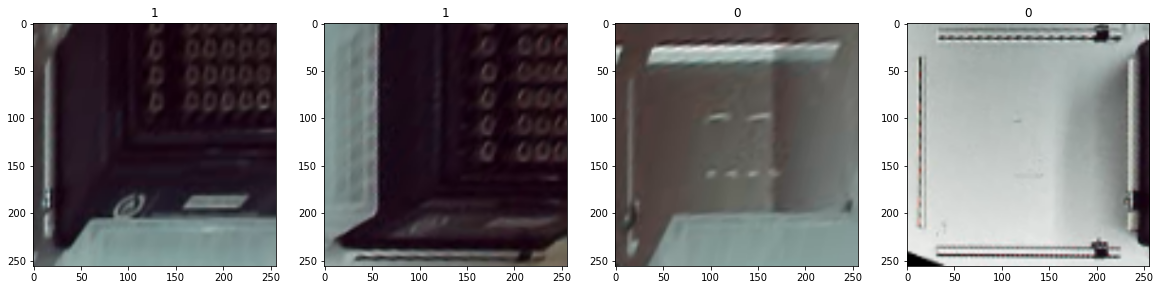

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.50980395, 0.56078434, 0.5529412 ],
          [0.5155331 , 0.5665135 , 0.55867034],
          [0.5415748 , 0.59255517, 0.584712  ],
          ...,
          [0.57833946, 0.6606924 , 0.6489277 ],
          [0.5768076 , 0.65916055, 0.64739585],
          [0.5764706 , 0.65882355, 0.64705884]],
 
         [[0.513511  , 0.56449145, 0.5566483 ],
          [0.51918226, 0.57016265, 0.5623195 ],
          [0.5449607 , 0.59594107, 0.58809793],
          ...,
          [0.5791899 , 0.66154283, 0.6497781 ],
          [0.57778966, 0.6601426 , 0.6483779 ],
          [0.5774816 , 0.65983456, 0.64806986]],
 
         [[0.53036153, 0.5813419 , 0.5734988 ],
          [0.53576946, 0.58674985, 0.5789067 ],
          [0.5603511 , 0.61133146, 0.6034883 ],
          ...,
          [0.58305544, 0.6654084 , 0.65364367],
          [0.58225363, 0.6646066 , 0.65284187],
          [0.5820772 , 0.66443014, 0.65266544]],
 
         ...,
 
         [[0.2657169 , 0.19307598, 0.22257966],
          [0.26802

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

6

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [14]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [20]:
logdir='logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2022-09-20 16:21:48.668329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 4s 143ms/step - loss: 0.5582 - accuracy: 0.6667 - val_loss: 0.3665 - val_accuracy: 0.9062
Epoch 2/20


2022-09-20 16:21:52.409071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 122ms/step - loss: 0.5128 - accuracy: 0.7708 - val_loss: 0.3342 - val_accuracy: 0.8750
Epoch 3/20
6/6 [==============================] - 1s 121ms/step - loss: 0.4770 - accuracy: 0.8281 - val_loss: 0.4052 - val_accuracy: 0.8438
Epoch 4/20
6/6 [==============================] - 1s 124ms/step - loss: 0.3656 - accuracy: 0.8177 - val_loss: 0.1883 - val_accuracy: 0.9375
Epoch 5/20
6/6 [==============================] - 1s 122ms/step - loss: 0.2243 - accuracy: 0.9167 - val_loss: 0.1584 - val_accuracy: 0.9062
Epoch 6/20
6/6 [==============================] - 1s 124ms/step - loss: 0.1803 - accuracy: 0.9167 - val_loss: 0.2256 - val_accuracy: 0.9062
Epoch 7/20
6/6 [==============================] - 1s 123ms/step - loss: 0.1832 - accuracy: 0.9010 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 8/20
6/6 [==============================] - 1s 129ms/step - loss: 0.1285 - accuracy: 0.9479 - val_loss: 0.1159 - val_accuracy: 0.9375
Epoch 9/20
6/6 [===============

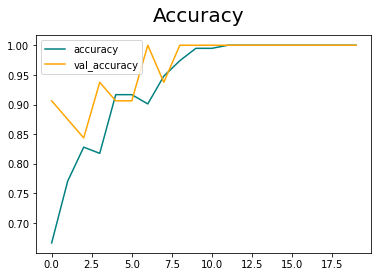

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

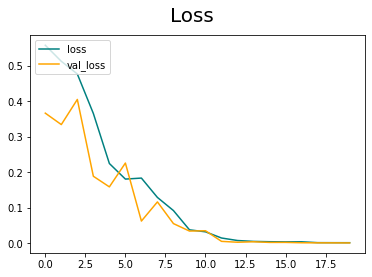

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [52]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Test

In [25]:
import cv2

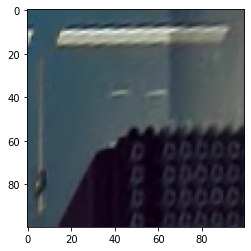

In [27]:
img = cv2.imread('/Users/codychu/Projects/Machine_Learning/Tester2.png')
plt.imshow(img)
plt.show()

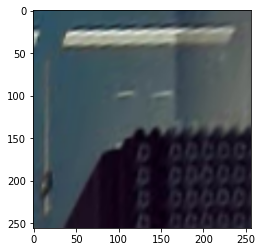

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))

2022-09-20 16:22:52.860879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [30]:
yhat

array([[5.450253e-07]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class is Labware')
else:
    print(f'Predicted class is Empty')

Predicted class is Empty


# Trained Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/Users/codychu/Projects/Machine_Learning/models/labwareclassifier.h5'))

In [ ]:
new_model = load_model('/Users/codychu/Projects/Machine_Learning/models/labwareclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Labware')
else:
    print(f'Predicted class is Empty')